In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import re

In [3]:
os.chdir('resampled_dataset_f1_n1')

In [4]:
os.chdir('resampled_dataset')

In [6]:
my_files = glob.glob('*txt')

In [5]:
len(my_files)

NameError: name 'my_files' is not defined

In [8]:
my_files[0]

'F1_raw_N1_R1_cycle_1000_10.txt'

In [9]:
file_1 = np.loadtxt(my_files[0])

In [10]:
len(file_1)

126

In [3]:
frequencies = pywt.scale2frequency('morl', np.arange(1,10)) *3000

In [100]:
wavlist = pywt.wavelist(kind='continuous')


In [101]:
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [41]:
cwtmatr, freqs = pywt.cwt(file_1, np.arange(1,11), 'morl')

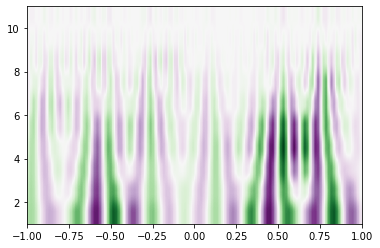

In [32]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 11], cmap='PRGn', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [4]:
frequencies

array([2437.5       , 1218.75      ,  812.5       ,  609.375     ,
        487.5       ,  406.25      ,  348.21428571,  304.6875    ,
        270.83333333])

In [33]:
cwtmatr.shape    

(10, 126)

In [34]:
freqs

array([0.8125    , 0.40625   , 0.27083333, 0.203125  , 0.1625    ,
       0.13541667, 0.11607143, 0.1015625 , 0.09027778, 0.08125   ])

In [35]:
file_2 = np.loadtxt(my_files[1])

In [42]:
cwtmatr, freqs = pywt.cwt(file_2, np.arange(1,11), 'morl')

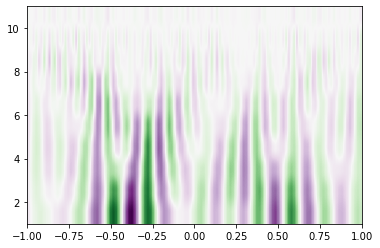

In [43]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 11], cmap='PRGn', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [44]:
cwtmatr.shape

(10, 126)

In [45]:
cwtmatr

array([[ 105.79281106,   12.7374824 ,  -55.30725533, ...,  -68.35107588,
          63.54772433, -445.24768598],
       [ -49.40744088,  173.29983967, -383.86760024, ...,  305.41765204,
        -871.7000162 ,  888.56368886],
       [-300.06879005, -283.95974096,  526.88249038, ..., -230.7207898 ,
        -279.58128079,  825.32974857],
       ...,
       [-515.72559428,  263.93549425,  944.28449018, ..., 1005.21815219,
        1461.39120601, 1418.6898362 ],
       [-404.22397237,  145.94930852,  644.89592458, ..., 1521.13943144,
        1730.35901521, 1508.27509933],
       [-576.20056169,  -41.75708625,  407.17862335, ..., 1736.10994673,
        2067.68367509, 1697.88992543]])

In [46]:
my_files[1]

'F1_raw_N1_R1_cycle_1000_100.txt'

In [48]:
res = np.zeros((len(my_files),10,126))

In [49]:
res.shape

(131000, 10, 126)

In [50]:
for i in range(len(my_files)):
    file = np.loadtxt(my_files[i])
    cwtmatr, freqs = pywt.cwt(file_2, np.arange(1,11), 'morl')
    res[i,:,:] = cwtmatr

In [52]:
len(res[0])

10

In [54]:
np.save('x_n1',res)


In [66]:
y = np.zeros(len(my_files))
for i in range(len(my_files)):
    test_string = my_files[i]
    temp = re.findall(r'\d+', test_string)
    lis = list(map(int, temp))
    loudness_level = int(lis[-1])
    index = int((loudness_level/5)-2)
    y[i] =  loudness_data_n1[index]
np.save('y_n1',y)

In [55]:
loudness_data_n1 = np.array([-0.669534,-0.546282,-0.546282,-0.671033,-0.683743,-0.147340,0.084086,0.203489,0.461973,0.421456,0.525431,0.691075,0.733513,0.761766,1.076224,1.245589,1.340460,1.642738,1.773085])

In [56]:
test_string = my_files[0]

In [60]:
lis = list(map(int, temp))

In [58]:
temp = re.findall(r'\d+', test_string)

In [61]:
loudness_level = int(lis[-1])

In [62]:
loudness_level

10

In [63]:
index = int((loudness_level/5)-2)

In [65]:
y[i] =  loudness_data_n1[index]

NameError: name 'y' is not defined

In [78]:
import numpy as np
from tensorflow import keras

In [86]:
from tensorflow import keras


AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_clear_session_function'

In [84]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.9.0 which is incompatible.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vinee\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.23.1-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3


In [87]:
from tensorflow import keras


In [94]:
from tensorflow.keras import layers

In [92]:
import tensorflow.keras as keras


In [90]:
!pip install -U -q segmentation-models

In [91]:
!pip install -q tensorflow==2.1


ERROR: Could not find a version that satisfies the requirement tensorflow==2.1
ERROR: No matching distribution found for tensorflow==2.1


In [95]:
pip uninstall tensorflow 


^C
Note: you may need to restart the kernel to use updated packages.


In [97]:
import tensorflow

In [98]:
tensorflow --version

NameError: name 'version' is not defined

In [99]:
pip show tensorflow

Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\vinee\anaconda3\lib\site-packages
Requires: wheel, grpcio, absl-py, keras-preprocessing, opt-einsum, flatbuffers, tensorflow-io-gcs-filesystem, wrapt, numpy, libclang, termcolor, tensorboard, typing-extensions, keras, h5py, tensorflow-estimator, astunparse, gast, six, google-pasta, protobuf
Required-by: 
Note: you may need to restart the kernel to use updated packages.
